In [186]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3


## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. 

In [187]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2]) # generates n//2 data sets of size 2 , with mean as 0 , then 2,2 is added thus centering the data to the point 2,2
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


In [188]:
X

array([[ 3.76405235,  2.40015721],
       [ 2.97873798,  4.2408932 ],
       [ 3.86755799,  1.02272212],
       ...,
       [-6.46836696,  3.5764787 ],
       [-4.93469439,  2.2264872 ],
       [-4.60505181,  2.49611011]])

## Problem 1
How many samples are there in the dataset?

## Solution

In [189]:
X.shape[0]

1998

## Problem 2

How many features are there in the dataset?


## Solution

In [190]:
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.

## Solution

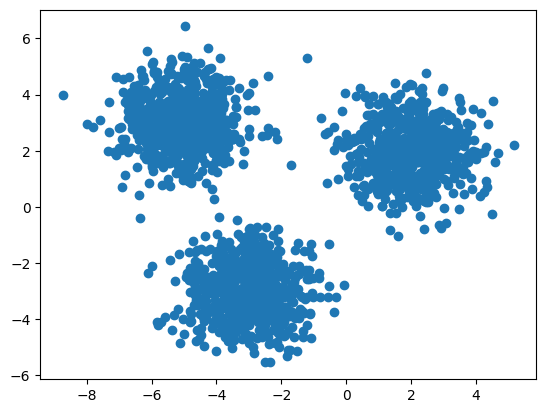

In [191]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])


## Instruction

Take the value of k=3 , and assign 3 random points from the data set as the centre.


In [192]:
k = 3
import random
L = np.array([random.randint(1,1998), random.randint(1,1998), random.randint(1,1998)]) #just random indexes , which will then be the consdiered as the initial centres :) 
centres = X[L]

## Problem 4 

Write a function , which assigns each point to the cluster

## Solution

In [193]:
def assign_clusters(X, k, centres):
  ans = []
  for i in range(len(X)):
    L = X[i]
    ans1 = [np.linalg.norm(L-each) for each in centres] #calculating the distance from each centre
    ans.append(ans1.index(min(ans1))) #storing the index of the distance which it is closest to 
  return np.array(ans)
  # z = np.array([])
  # for each in X:
  #   dists_from_each_center = [np.linalg.norm(centres[i]- each) for i in range(k)] 
  #   z = np.append(z, np.argmin(dists_from_each_center))
  # return z

z = assign_clusters(X, k, centres)
z

array([2, 2, 1, ..., 0, 0, 0])

In [194]:
z.mean()

0.7652652652652653

## Problem 5

Plot the data points, with different color for different clusters.

## Solution

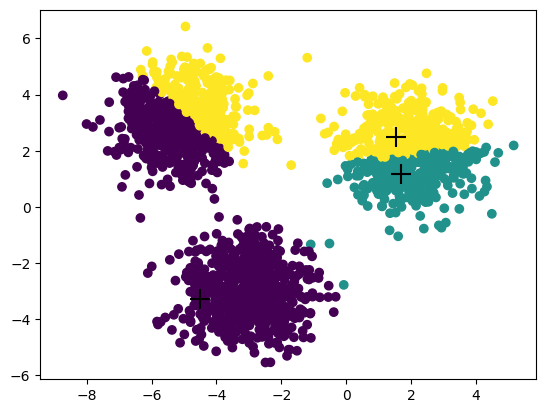

In [195]:
plt.scatter(X[:, 0], X[:, 1], c = z)
plt.scatter(centres[:, 0], centres[:, 1], marker = '+', s = 200, color = 'k')

#plotting after assigning random centres.

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per `z` and returns `k` new cluster centers.

## Solution

In [196]:
def compute_cluster_centers(X, z, k):
  mean = [[] for i in range(k)]
  for i in range(len(z)): # z was the previous mean centres
    mean[z[i]].append(X[i])
  for i in range(k): 
    mean[i] = np.mean(mean[i],axis=0) #recomputing the cluster means , np.mean converts a list to a numpy array :).
  return np.array(mean)
  # cluster_centers = np.array([np.mean(X[z == i], axis = 0) for i in range(k)])
  # return cluster_centers

cluster_centers = compute_cluster_centers(X, z, k)
cluster_centers

array([[-3.99397756, -0.87065489],
       [ 2.03478017,  1.12450164],
       [-0.73993847,  3.13412054]])

In [197]:
cluster_centers.mean(axis = 0) #means of cluster 

array([-0.89971196,  1.12932243])

## Extra

Keep executing the code in problems 4, 5 and 6 (for, say 10 iterations) to observe how the clusters change across different iterations.

## Solution

As we can see , in the above image , with 0 iteration , the centres are not so in sync , but in the photo below the centres are so awesome :). Doing this just 10 times was enough , but some times , it just settles into the local minima , which causes a problem , for which k-means ++ would be a better method ;-;.

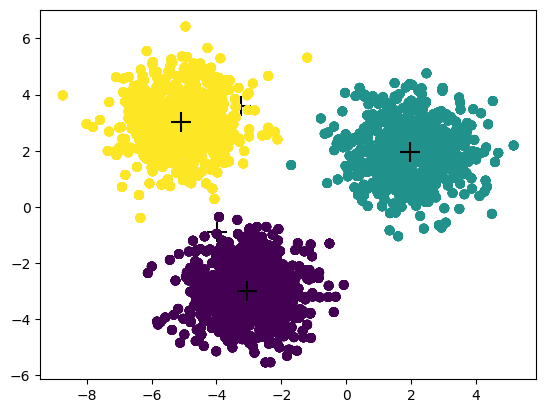         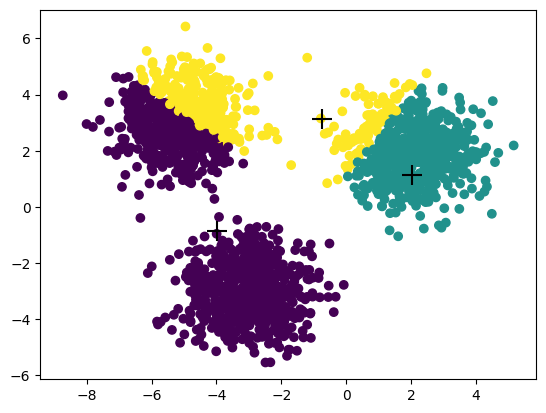

This is the difference between 10 and 1 iterations.

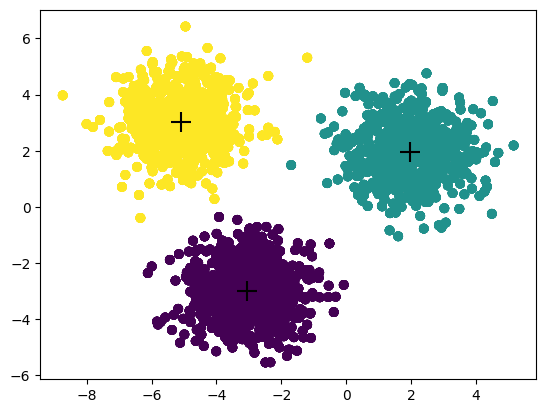

In [200]:
for i in range(10):
  z = assign_clusters(X, k, cluster_centers)
  plt.scatter(X[:, 0], X[:, 1], c = z)
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = '+', s = 200, color = 'k')
  cluster_centers = compute_cluster_centers(X, z, k)
